# Imports

In [1]:
import numpy as np

from robpy.covariance import FastMCDEstimator, WrappingCovarianceEstimator, OGKEstimator, RobustCovarianceEstimator, KendallTauEstimator

# Generate data

In [2]:
n_samples = 125
n_outliers = 25
n_features = 2

# generate Gaussian data of shape (125, 2)
gen_cov = np.eye(n_features)
gen_cov[0, 0] = 2.0
X = np.dot(np.random.randn(n_samples, n_features), gen_cov)
# add some outliers
outliers_cov = np.eye(n_features)
outliers_cov[np.arange(1, n_features), np.arange(1, n_features)] = 7.0
X[-n_outliers:] = np.dot(np.random.randn(n_outliers, n_features), outliers_cov)

# Default covariance

In [3]:
class DefaultCovarianceEstimator(RobustCovarianceEstimator):
    def calculate_covariance(self, X):
        return np.cov(X, rowvar=False)

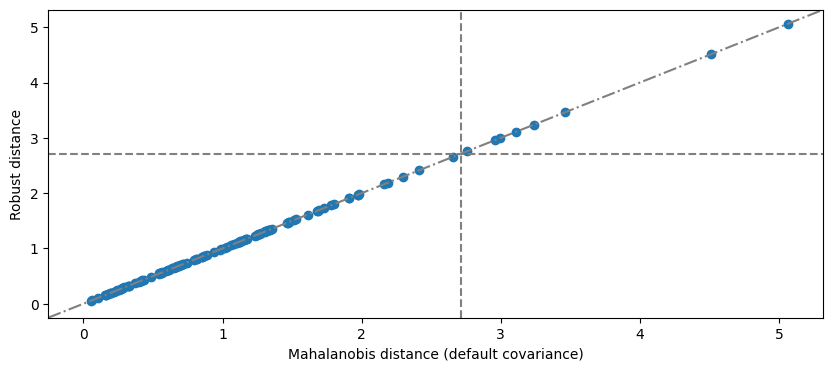

In [4]:
cov = DefaultCovarianceEstimator().fit(X)
fig = cov.distance_distance_plot()

# Fast MCD

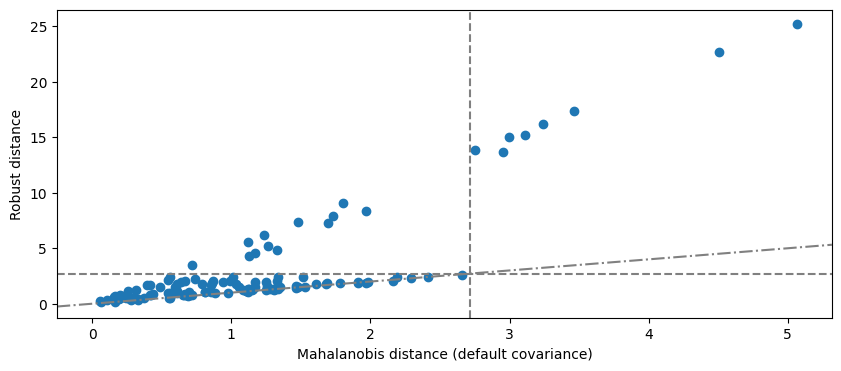

In [5]:
mcd = FastMCDEstimator().fit(X)
fig = mcd.distance_distance_plot()

# Wrapping

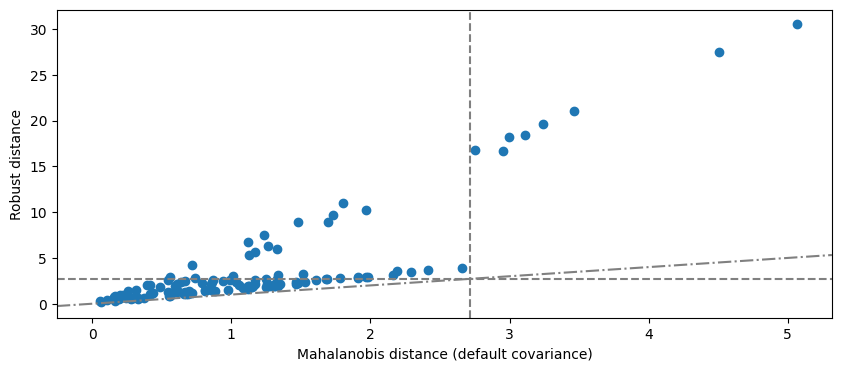

In [6]:
wrapcov = WrappingCovarianceEstimator().fit(X)
fig = wrapcov.distance_distance_plot()

# OGK

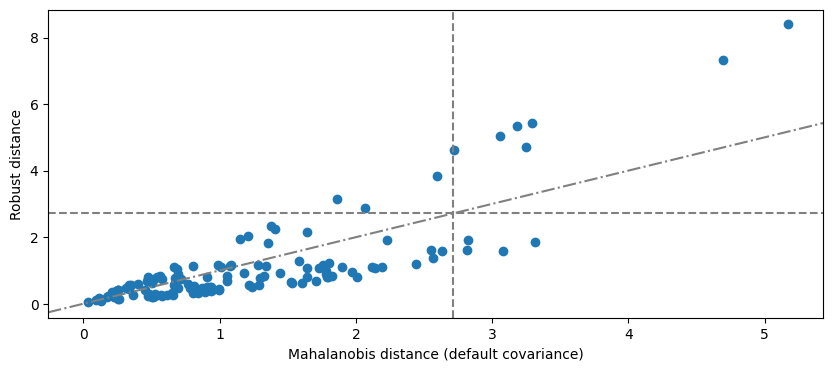

In [7]:
ogk_cov = OGKEstimator().fit(X)
fig = ogk_cov.distance_distance_plot()

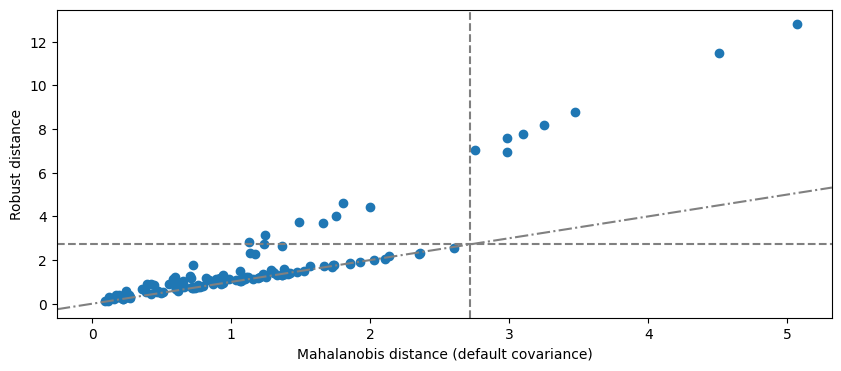

In [8]:
ogk_cov = OGKEstimator(reweighting=True).fit(X)
fig = ogk_cov.distance_distance_plot()

# Kendall

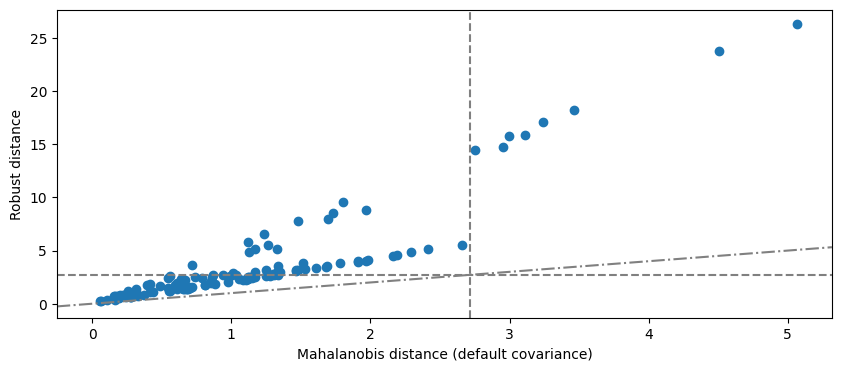

In [9]:
kendall_cov = KendallTauEstimator().fit(X)
fig = kendall_cov.distance_distance_plot()

In [10]:
kendall_cov.correlation, kendall_cov.covariance

(array([[1.        , 0.04077419],
        [0.04077419, 1.        ]]),
 array([[1.        , 0.14007375],
        [0.14007375, 1.        ]]))